In [1]:
import pandas as pd, numpy as np

### Cluster Attribute Value Counts

In [15]:
clust_itm_atb = pd.read_csv('AttributeData_Itemwise_Clustering_500K_081723.csv')

C:\Users\iny8251\AppData\Local\Temp\ipykernel_18404\2734838643.py:1: DtypeWarning: Columns (8,15,17,18,19,24,26,28,31,32,35,36,37,40,41,43,44,45,46,47,48,49,50,54,55,56,57,59,61,62,63,68,70,72,73,75,88,89,96,100,107,108,116,117,120,122,128,134,136,137,138,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,186,187,188,189,190,191,192,193,194,195,196,198,201,203,204,205,206,207,209,211,213,214,215,216,219,220,221,223,225,227,228,230,231,232,235,237,238,240,241,243,244,245,246,251,259,265) have mixed types. Specify dtype option on import or set low_memory=False.
  clust_itm_atb = pd.read_csv('AttributeData_Itemwise_Clustering_500K_081723.csv')


In [16]:
clust_itm_atb.head()

,GTIN_NO,ClusterLabel,Cluster Name,Cluster Size,Method of Sweetening,Level of Sugar/Sucrose/Sweetener Claim,Whole Grains - Contained in Product,Flavor(s),Milk Product/Substitute,Cheese Product Type,...,Grouper and its Derivatives,Trout and its Derivatives,Dory fish and its derivatives,Goat Milk,Cutlassfish and its derivatives,Wolffish and its derivatives,Chinquapins and Their Derivatives,Pili Nuts and Their Derivatives,Ginkgo Nuts and Their Derivatives,Bonito fish and its derivatives
0,697334409960,6369,"DIY ELECTRICAL,MODELS",12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,196093419826,1020,"ACCENT FURNITURE,WALL ART,SCHOOL SUPPLIES,CUTT...",65,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,89734005116,559,"750ML RED PREM WINES $8-14.99,750ML RED LUXURY...",104,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41226893304,6873,"MENS SS KNIT SHIRT,MENS LS KNIT SHIRT",11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,766572228494,306,"SALMON FR - ATLANTIC,SMOKED SALMON,SALMON FR V...",171,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
atb_cols = clust_itm_atb.columns[4:]
res = pd.DataFrame(clust_itm_atb.groupby('ClusterLabel').apply(lambda x:{i: dict(x[i].value_counts()/len(x)) for i in atb_cols})).reset_index()

In [19]:
res.to_csv('Clust_Attribute_Distributions_0831.csv', index = None)

In [31]:
atb_cols = clust_itm_atb.columns[4:]
res = pd.DataFrame(clust_itm_atb.groupby('ClusterLabel').apply(lambda x:{i: len(x[i].dropna())/len(x) for i in atb_cols})).reset_index()

In [33]:
pd.DataFrame(list(res[0])).to_csv('Clust_Attribute_Frequency_0831.csv', index = None)

### Attribute Frequency based Clustering

In [2]:
atb_freq = pd.read_csv('Clust_Attribute_Frequency_0831.csv')

In [130]:
clust_atb = pd.read_csv('SuperClusteringResults_081723.csv')[['ClusterLabel','Cluster Name','Cluster Size','Non-Null Attributes']]

In [131]:
clust_atb

,ClusterLabel,Cluster Name,Cluster Size,Non-Null Attributes
0,0,"PARTY EVERYDAY,NOVELTY AND DECOR,GIFT-WRAP SEA...",1306,"['Color', 'Size Description', 'Other Size Desc..."
1,1,"ACCENT FURNITURE,KITCHEN/DINING,DECORATIVE ACC...",1145,"['Genre', 'Color', 'Size Description', 'Other ..."
2,2,"TEA BAGS & BULK TEA,TEA SWEETENED,TEA BAGS/HER...",1086,"['Method of Sweetening', 'Level of Sugar/Sucro..."
3,3,CARDS EVERYDAY,1085,"['VND_BRN_NAM', 'NET_CONT_EQV_UOM_VIP_TO_KRG_U..."
4,4,"COLD WEATHER ACS,BRANDED COLLECTIONS,JUNIOR SL...",991,"['Color', 'Size Description', 'Other Size Desc..."
...,...,...,...,...
7153,7154,"MARIKA CURVES,MARIKA,4-16 BOTTOMS,SNACK MIX",10,"['MIN_DAYS_OF_SHF_LIF_AT_WHS_DAYS', 'NET_CONT_..."
7154,7155,"DVD'S,PUZZLES,GIFT-WRAP EVERYDAY,LAUNDRY",10,"['Genre', 'Color', 'Size Description', 'Consum..."
7155,7156,"NCAA OTHER,PHARMACY SUPPLIES,OTHER EVENTS,MARI...",10,"['Color', 'Size Description', 'Other Size Desc..."
7156,7157,"DIY ELECTRICAL,WORK LIGHTS,WATER BOTTLES",10,"['Color', 'LIV_NAT_ELG_FL', 'ALH_FL', 'IS_EDBL..."


In [106]:
atb_freq

,Method of Sweetening,Level of Sugar/Sucrose/Sweetener Claim,Whole Grains - Contained in Product,Flavor(s),Milk Product/Substitute,Cheese Product Type,Juice Percentage,Level of Cooking,Genre,Color,...,Grouper and its Derivatives,Trout and its Derivatives,Dory fish and its derivatives,Goat Milk,Cutlassfish and its derivatives,Wolffish and its derivatives,Chinquapins and Their Derivatives,Pili Nuts and Their Derivatives,Ginkgo Nuts and Their Derivatives,Bonito fish and its derivatives
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.983155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000873,0.081223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.118785,0.105893,0.005525,0.034991,0.005525,0.005525,0.037753,0.006446,0.000000,0.009208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
clust_atb['AttributeVector'] = list(atb_freq.values)

In [9]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', random_state= 42).fit_transform(np.array(atb_freq.values))

<Axes: title={'center': '2d projection of clusterwise attribute frequencies'}>

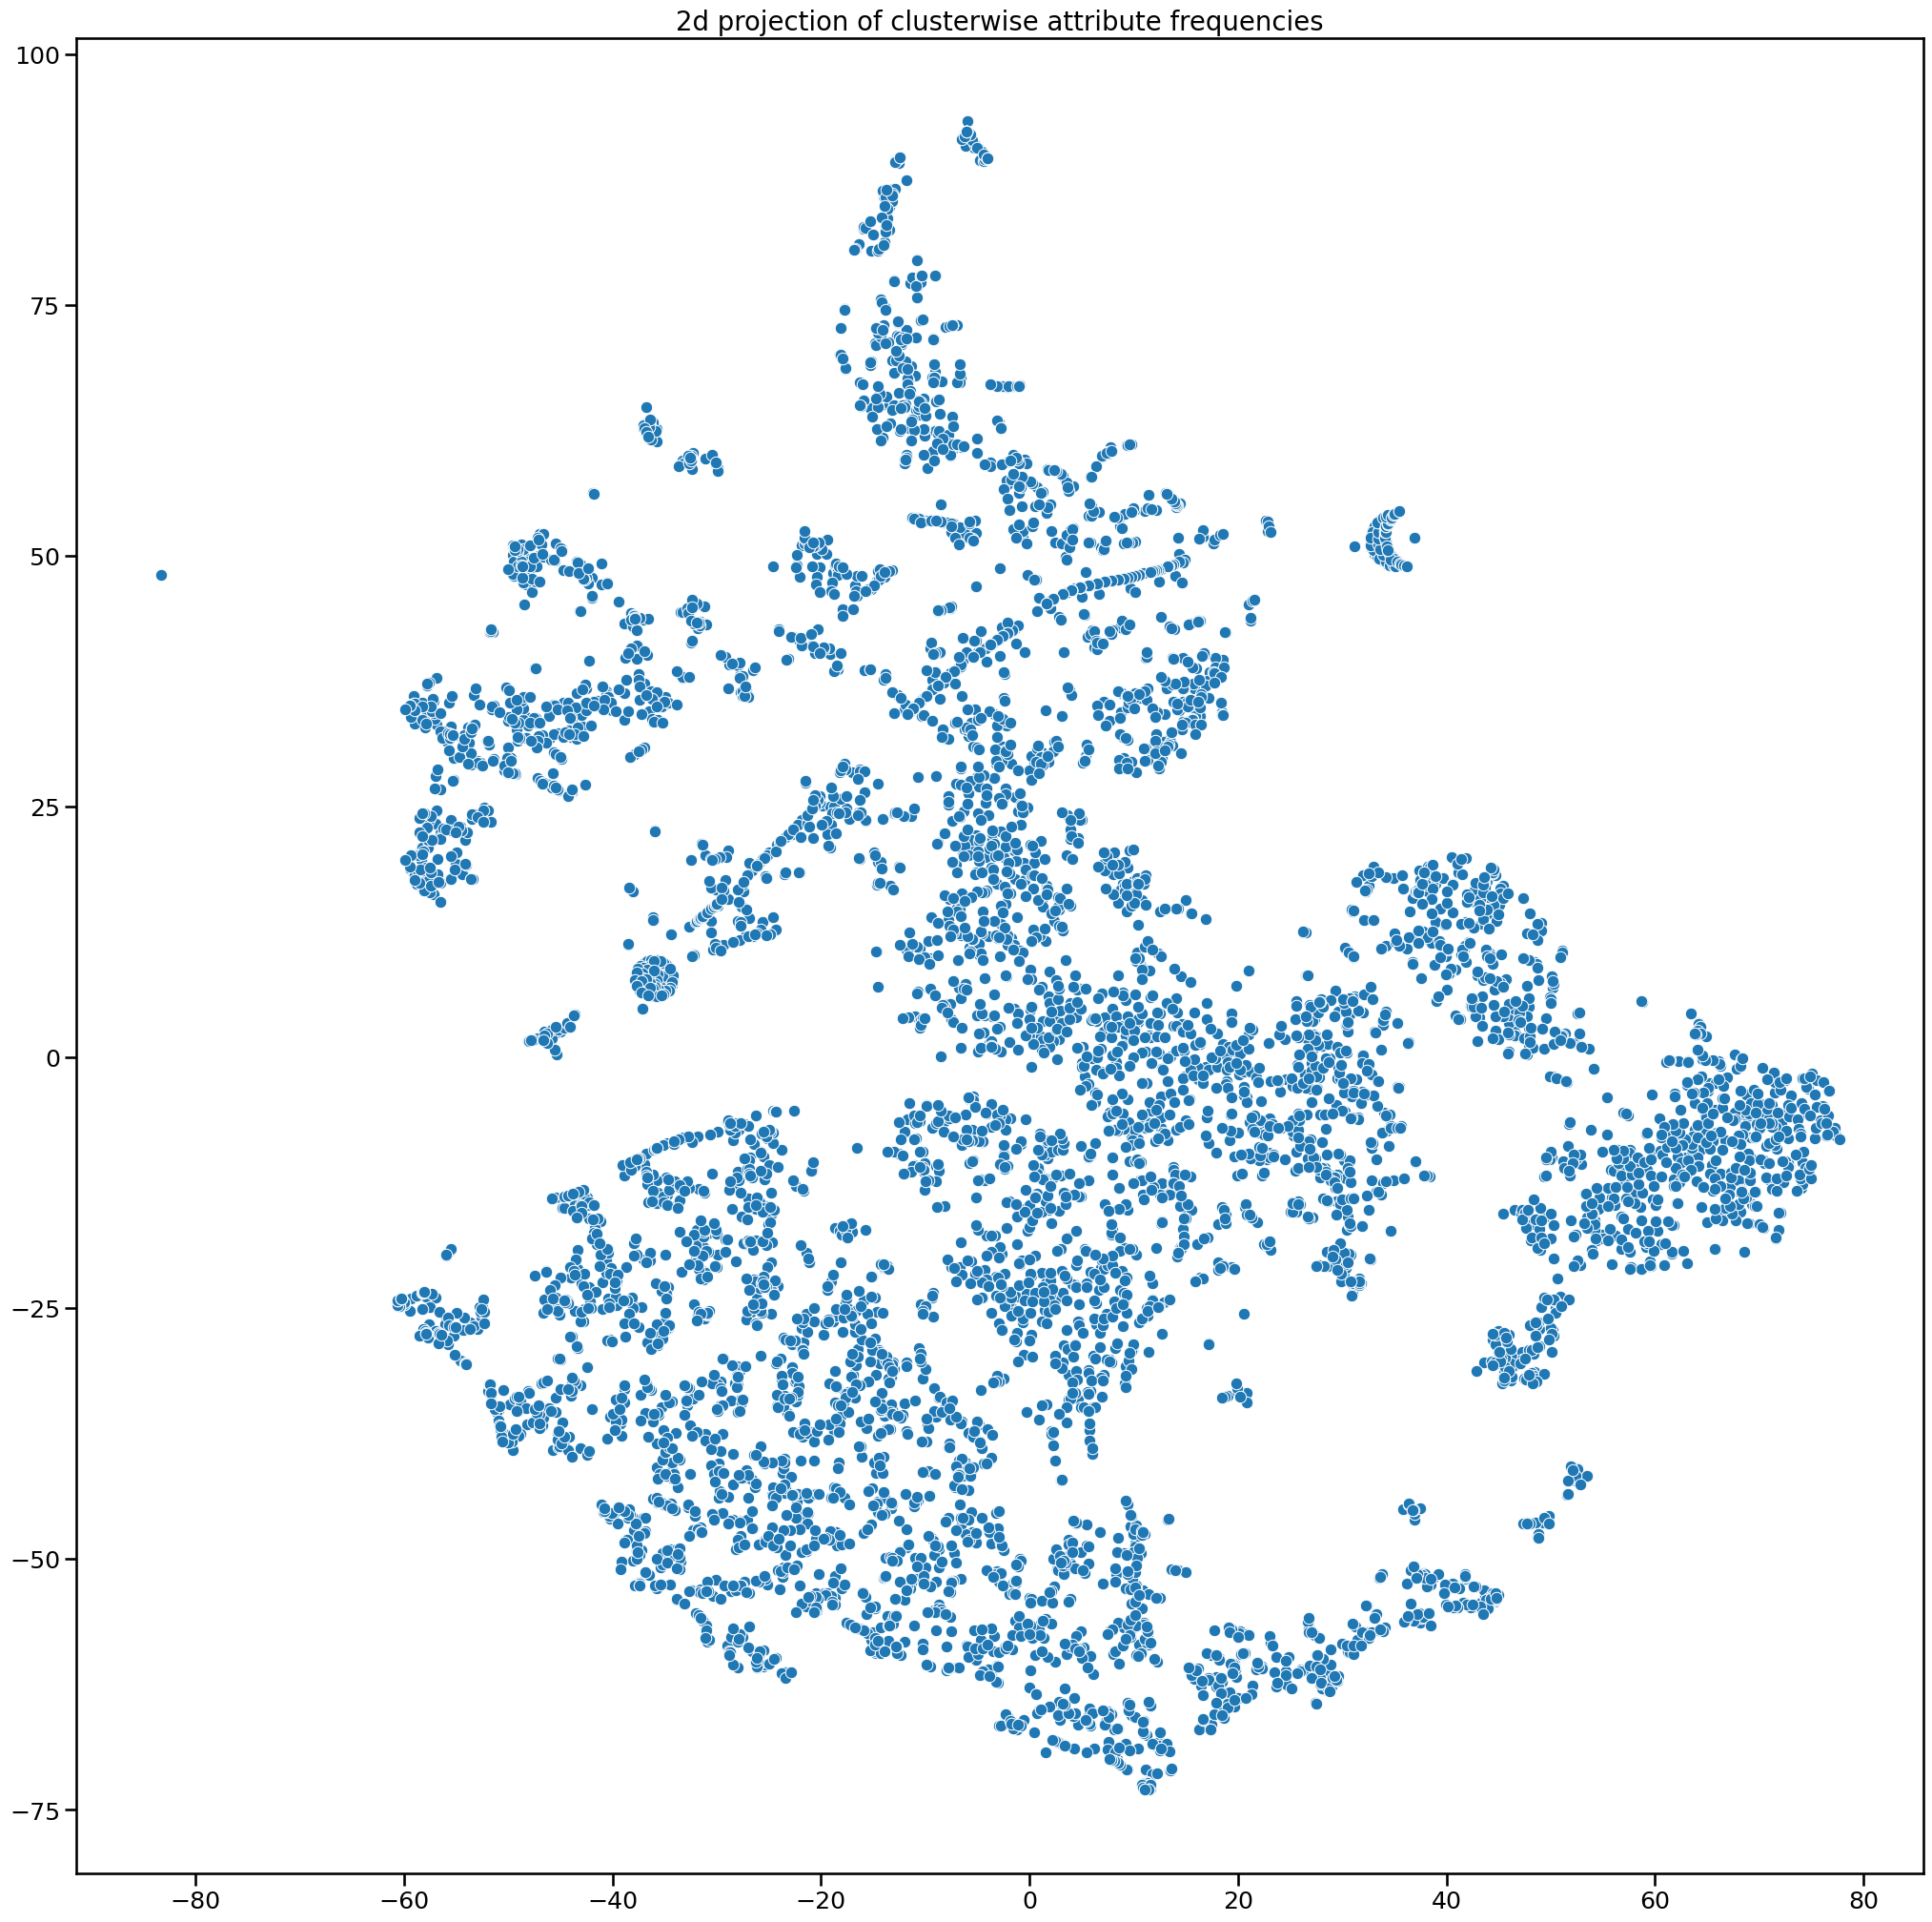

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(25,25))
plt.title('2d projection of clusterwise attribute frequencies')
sns.scatterplot(x=X_embedded.T[0], 
                y=X_embedded.T[1])
                #hue=kmeans.labels_,  style=kmeans.labels_,palette = "gist_rainbow",legend= 'full')

In [13]:
from sklearn.cluster import HDBSCAN, KMeans
hdb = HDBSCAN(min_cluster_size= 5)
hdb.fit(atb_freq.values)

HDBSCAN()

In [133]:
clust_atb['SuperClusterLabel'] = hdb.labels_

<Axes: title={'center': '2d projection of clusterwise attribute frequencies'}>

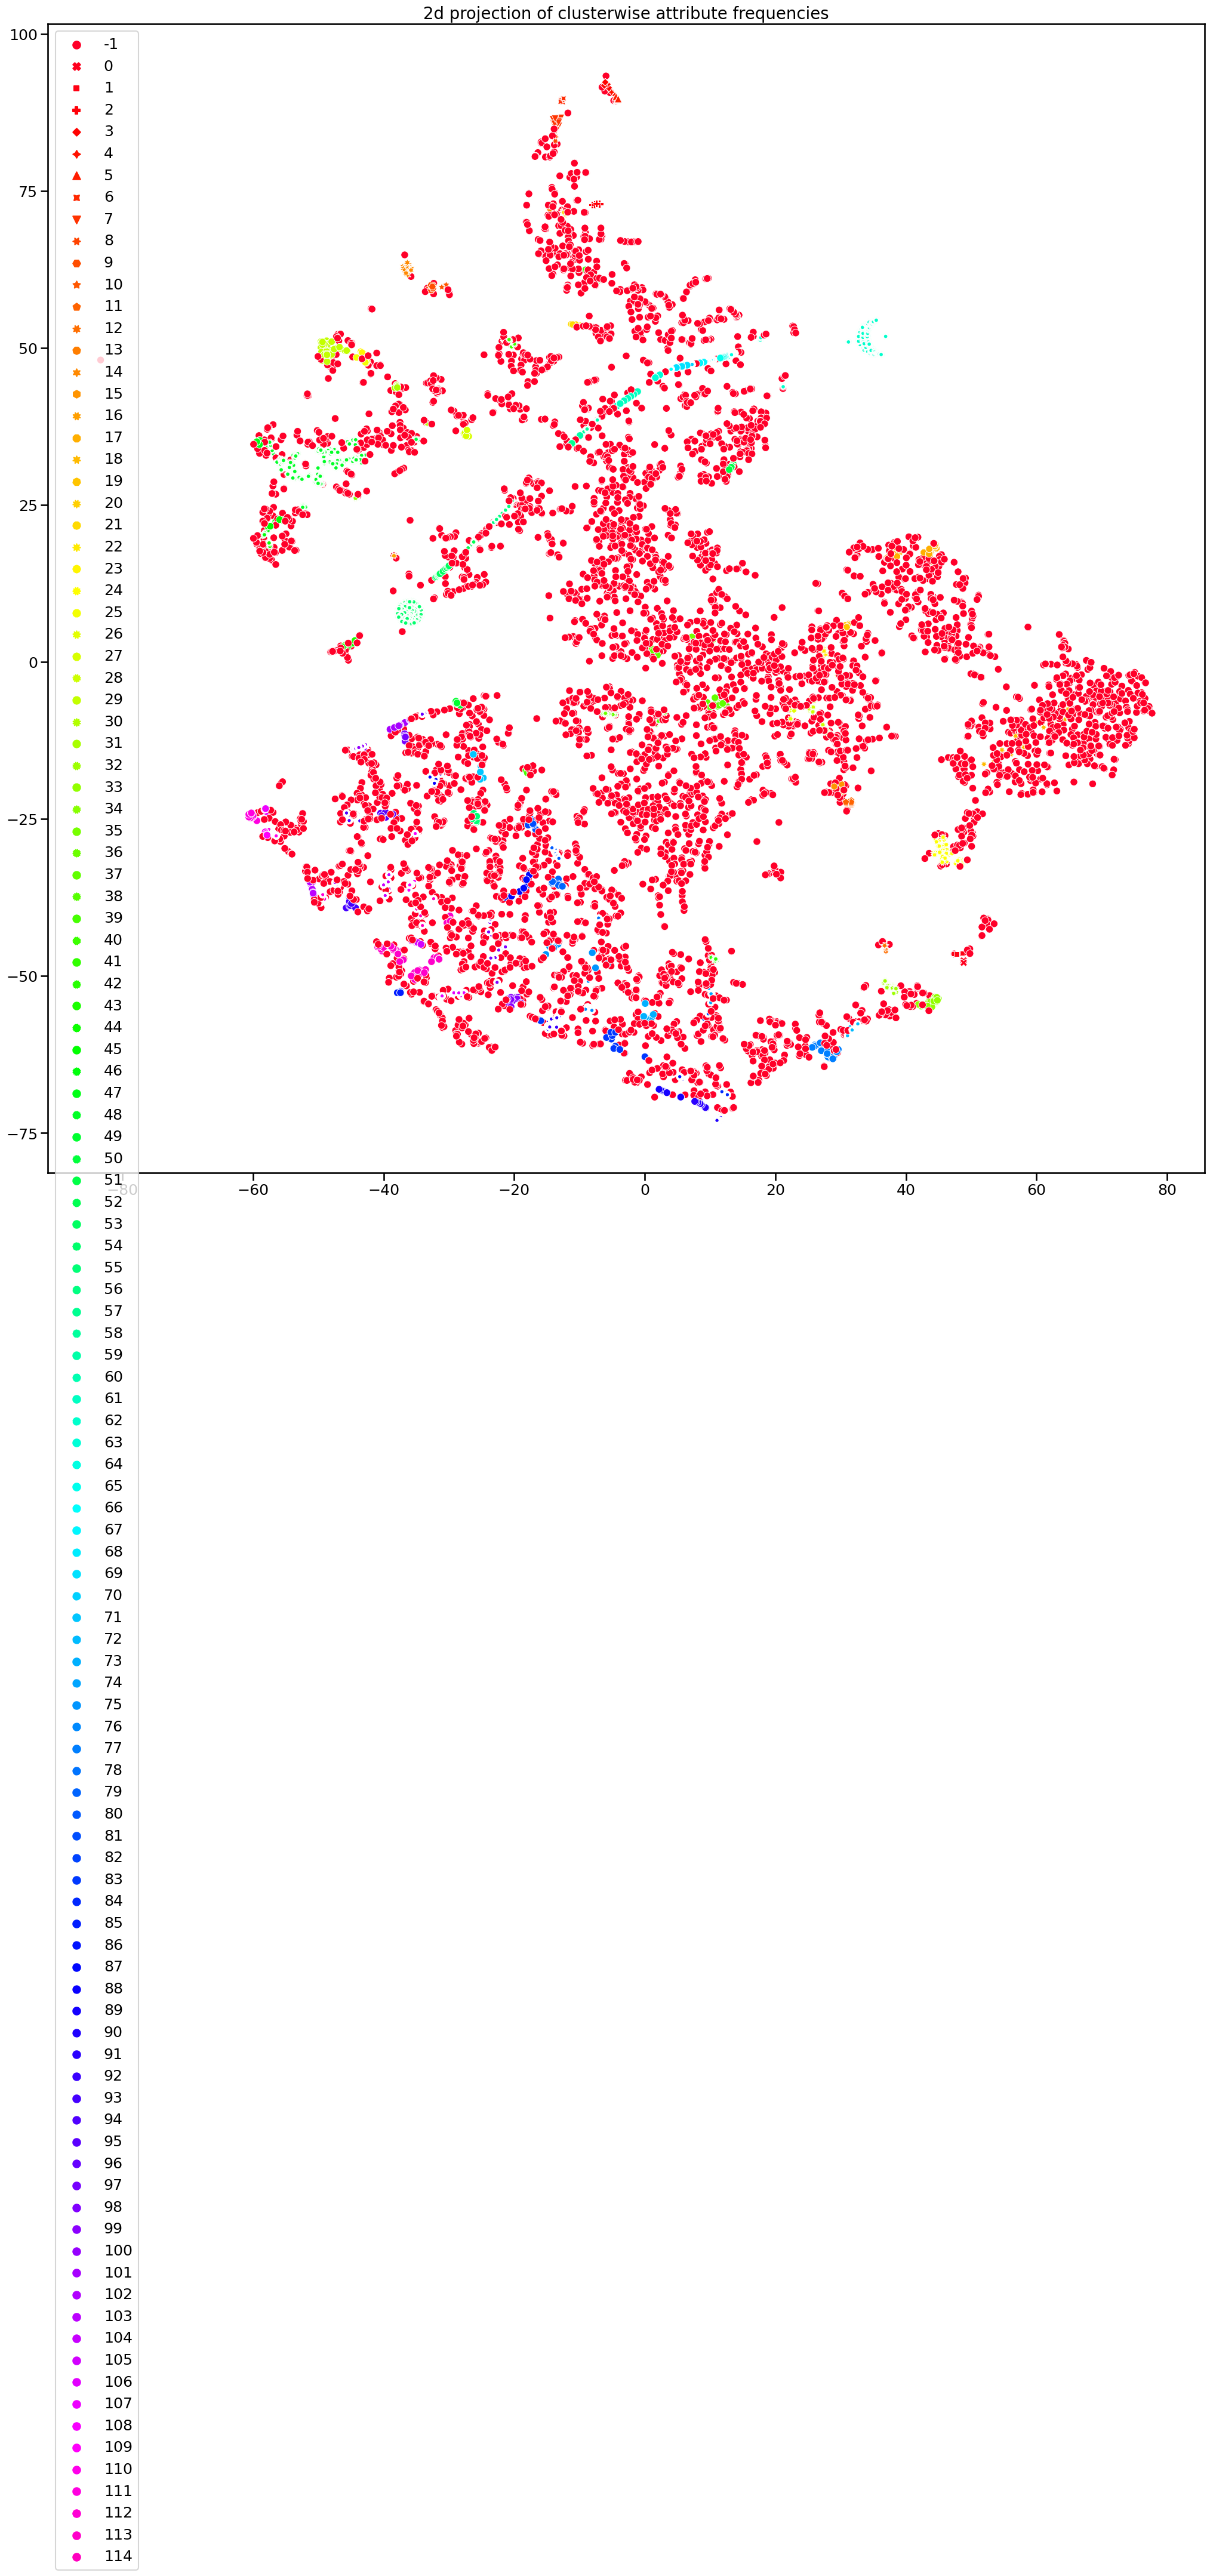

In [16]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(25,25))
plt.title('2d projection of clusterwise attribute frequencies')
sns.scatterplot(x=X_embedded.T[0], 
                y=X_embedded.T[1],
                hue=hdb.labels_,  style=hdb.labels_,palette = "gist_rainbow",legend= 'full')

In [96]:
#Frequency ranges 
freq_by_atb = atb_freq.describe().T
freq_by_atb = freq_by_atb[freq_by_atb['max'] >0]

In [97]:
freq_by_atb

,count,mean,std,min,25%,50%,75%,max
Method of Sweetening,7158.0,6.192338e-03,0.036710,0.0,0.0,0.0,0.0,0.904762
Level of Sugar/Sucrose/Sweetener Claim,7158.0,9.346532e-03,0.045363,0.0,0.0,0.0,0.0,0.904762
Whole Grains - Contained in Product,7158.0,2.349519e-03,0.019444,0.0,0.0,0.0,0.0,0.904762
Flavor(s),7158.0,4.931994e-03,0.028330,0.0,0.0,0.0,0.0,0.909091
Milk Product/Substitute,7158.0,1.835756e-03,0.016979,0.0,0.0,0.0,0.0,0.600000
...,...,...,...,...,...,...,...,...
Yam and its derivatives,7158.0,2.367861e-06,0.000200,0.0,0.0,0.0,0.0,0.016949
Apple and its derivatives,7158.0,3.968859e-07,0.000034,0.0,0.0,0.0,0.0,0.002841
Lichee Nuts and Their Derivatives,7158.0,1.286407e-07,0.000011,0.0,0.0,0.0,0.0,0.000921
Mango and its derivatives,7158.0,8.898333e-07,0.000075,0.0,0.0,0.0,0.0,0.006369


In [134]:
import ast
clust_atb['Non-Null Attributes'] = clust_atb['Non-Null Attributes'].apply(lambda x: ast.literal_eval(x))
clust_atb['Attribute_Frequency'] = clust_atb.apply(lambda x: dict(zip(x['Non-Null Attributes'],\
                                                                      [i for i in list(x['AttributeVector']) if i !=0])), axis = 1)


In [140]:
clust_atb['SuperClusterSize'] = clust_atb.SuperClusterLabel.map(dict(clust_atb.groupby('SuperClusterLabel').size()))

In [142]:
clust_atb[['ClusterLabel','Cluster Name','Cluster Size','Attribute_Frequency','SuperClusterLabel','SuperClusterSize']].to_csv('AttributeFreqSuperClustering_0901.csv', index = None)